<h1>Сборный проект</h1>

<h2>Задача:</h2>

***выявить закономерности, определяющие успешность игр, для построения маркетингоавой стратегии стримингово сервиса.***<br>

ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


<a id='bullet_0'></a><h2>План реализации проекта</h2>

##### [Часть 1. Изучение общей информации:](#bullet_1)
 1.1 Изученеие файлов с данными, получение общей информации, загрузка библиотек.(Путь к файлу: /datasets/games.csv.)<br>

 1.2 Заменить названия столбцов (привести к нижнему регистру);<br>

##### [Часть 2. Подготовка данных:](#bullet_2)



 2.1. Приведение данных к нужным типам.<br>
 
 2.2 Ликвидация пропусков<br>
 
 2.3. Посчитать и добавить отдельный столбец: суммарные продажи во всех регионах.<br>


 ##### [Часть 3. Провести исследовательский анализ данных:](#bullet_3)



 ##### [Часть 4. Составить порьрет пользователя для каждого региона](#bullet_4)
 ##### [Часть 5. Проверка гипотиз](#bullet_5)
 

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;<br>
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.<br>


##### [Часть 6. Напишите общий вывод](#bullet_6)


<h3>Влияние рейтинга ESRB на продажи в регионах<h3>

<h2>1. Изучение общей информации:</h2>

<a id='bullet_1'></a><h3>1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.</h3>

In [1]:
#импорт библиотек
import pandas as pd
import math as mt
from scipy import stats as st
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#загрузили, посмотрели, сразу поправили названия столбцов
games = pd.read_csv('games.csv')
games.columns = map(str.lower, games.columns)
games = games.rename(columns={'rating':'esrb_rating'})
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.tail(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [4]:
games['esrb_rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [5]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
esrb_rating        6766
dtype: int64

In [6]:
games['esrb_rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [7]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [8]:
games.duplicated().sum()

0

In [9]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


[назад к оглавлению](#bullet_0)

***Подгрузили библиотеки,открыли файлы с данными, изучили общую информацию, поправили названия столбцов.<br> Обнаружили пропуски и нулевые значения.<br> Проверили на наличие дубликатов - отсутсвуют.<br> Нужно замеить тип данных: user_score на float, он стал object из-за значения 'tbd'(прописано в задании) - гуглим значения 'tbd' - To Be Determined, т.е не определен - нужно заменить на NAN***<br> 

***По пропускам:***<br>
year_of_release     269   -  поменять тип на int<br>
critic_score       8578  - заменить пропуски на маркер<br>
user_score         6701  -поменять на float, заменить пропуски маркером<br>
esrb_rating             6766<br> оставим как есть
Значения рейтингов заменить на средние нельзя(будет не честно), год релиза . Численные рейтинги заменим числом-маркером, для возможности работы с данными в этих столбцах. пропуски в дате и esrb_rating оставим

<a id='bullet_1'></a><h2>2. Подготовка данных</h2>

***2.1 Приведение данных к нужным типам***

#чтобы заменить тип даных user_score нужно убрать 'tbd' - заменить на nan
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

In [10]:
#сделаем год int для красоты, предварительн убрав nan
games['year_of_release'] = games['year_of_release'].fillna(0)
games['year_of_release'] = games['year_of_release'].astype('int')
#games.info()
#games.head()

***2.2 Избавляемся от пропусков***

In [11]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)
games.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
esrb_rating        6766
dtype: int64

***2.3. Посчитать и добавить отдельный столбец: суммарные продажи во всех регионах.***

In [12]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
#games['total_sales'].tail(40)

[назад к оглавлению](#bullet_0)

<a id='bullet_3'></a><h2>3. Провести исследовательский анализ данных<h2>

* Посмотреть распределение по годам(построить гистограмму)
* Посмотреть распределение по платформам. Построить распределени по годам для платформ с наибольшими продажами.
* Сделать вывод по периодам для определения выборки
* Построить "ящик с усами" по глобальным продажам игр в разбивке по платформам. Описать результат.
* Узнайте, на какой платформе было выпущено больше всего игр
* Определите, игр какого жанра больше всего
* Найдите игры с наибольшей и наименьшей оценкой от пользователей
* Найдите игры с наибольшей и наименьшей оценкой от критиков
* Оцените корреляцию между оценками критиков и пользовательскими оценками

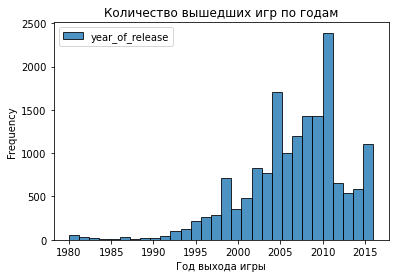

In [13]:
#строим распределение релизов по годам
title = 'Количество вышедших игр по годам'
plt.xlabel('Год выхода игры')
games[games['year_of_release'] != 0]['year_of_release'].plot(kind='hist', bins=30, title = title, ec='black', alpha=0.8).legend()

***Есть период роста продаж с 1990 го по 2011 с пиками(возможно технологческие прорывы). В 2011 году падение и, видимо новый виток на рост. Возможно 2011-2015 г. можно взять за период намечающейся новой тенденции с возможным ростом или продолжением снижения интереса к играм в 2016.***

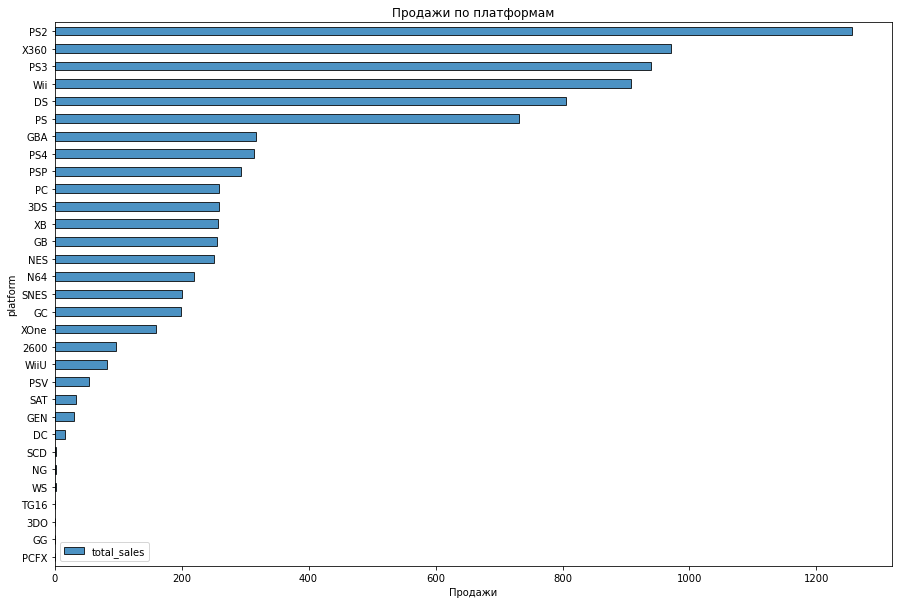

In [14]:
#Смотрим на каких платформах болше всего играли
title='Продажи по платформам'
plt.xlabel('Продажи')
df_to_plot = games.groupby('platform')['total_sales']
df_to_plot_calculated = df_to_plot.sum().sort_values()
df_to_plot_calculated.plot(kind='barh', figsize=(15,10), title=title, ec='black', alpha=0.8).legend()

***Шсть безусловных лидеров, в порядке убывания: PS2, X360, PS3, Wii, DS, PS***

In [15]:
#Построить распределени по годам для платформ с наибольшими продажами.
popular_pl = games[games['platform'].isin(['PS3', 'PS2', 'X360', 'Wii', 'DS', 'PS'])]

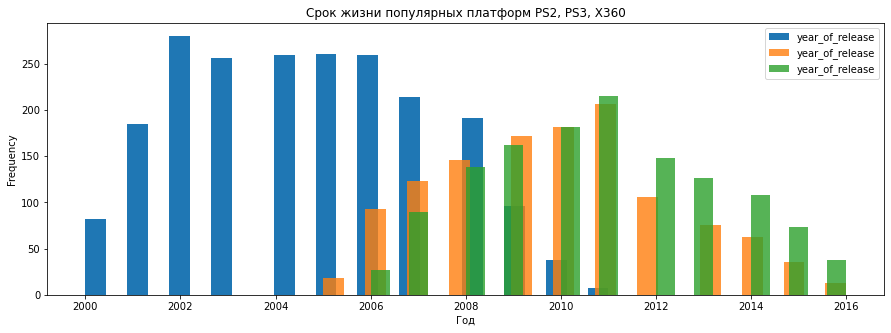

In [16]:
title='Срок жизни популярных платформ PS2, PS3, X360'
plt.xlabel('Год')
popular_pl[(popular_pl['year_of_release'] != 0) & (popular_pl['platform'].isin(['PS2']))]['year_of_release'].plot(kind='hist', bins=25, figsize=(20,5), title=title).legend()
popular_pl[(popular_pl['year_of_release'] != 0) & (popular_pl['platform'].isin(['X360']))]['year_of_release'].plot(kind='hist', bins=25, figsize=(15,5), alpha=0.8).legend()
popular_pl[(popular_pl['year_of_release'] != 0) & (popular_pl['platform'].isin(['PS3']))]['year_of_release'].plot(kind='hist', bins=25, figsize=(15,5), alpha=0.8).legend()


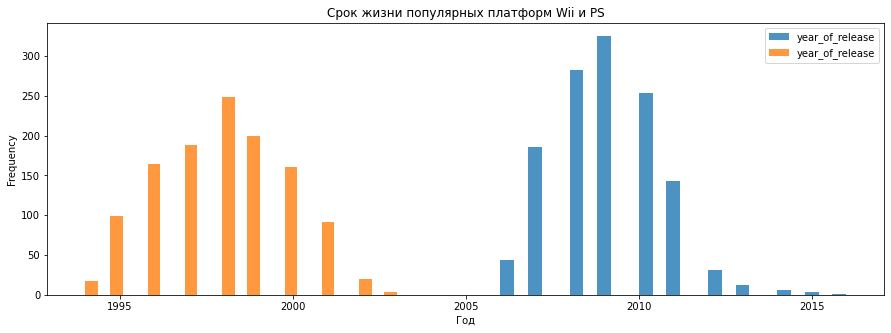

In [17]:
title='Срок жизни популярных платформ Wii и PS'
plt.xlabel('Год')
popular_pl[(popular_pl['year_of_release'] != 0) & (popular_pl['platform'].isin(['Wii']))]['year_of_release'].plot(kind='hist', bins=25, figsize=(15,5), alpha=0.8, title=title).legend()
popular_pl[(popular_pl['year_of_release'] != 0) & (popular_pl['platform'].isin(['PS']))]['year_of_release'].plot(kind='hist', bins=25, figsize=(15,5), alpha=0.8).legend()


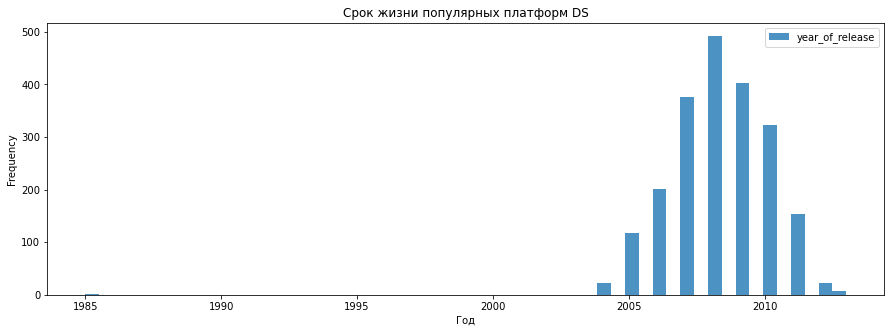

In [18]:
#срок жизни DS
title='Срок жизни популярных платформ DS'
plt.xlabel('Год')
popular_pl[(popular_pl['year_of_release'] != 0) & (popular_pl['platform'].isin(['DS']))]['year_of_release'].plot(kind='hist', bins=55, figsize=(15,5), alpha=0.8, title=title).legend()

In [19]:
#itle='время жизни PS2'
#lt.xlabel('Год')
#opular_pl = games[games['platform'].isin(['PS2'])]
#opular_pl[popular_pl['year_of_release'] != 0]['year_of_release'].plot(kind='hist', bins=30, title = title, ec='black', alpha=0.8).legend()


<AxesSubplot:title={'center':'Общие родажи за каждый год'}, xlabel='year_of_release'>

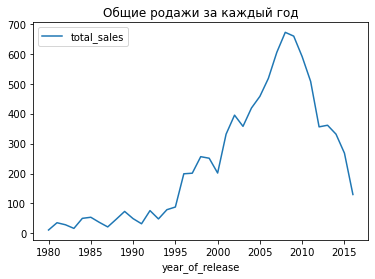

In [20]:
title='Общие родажи за каждый год'
games[games['year_of_release'] != 0].groupby('year_of_release').agg({'total_sales':'sum'}).plot(title=title)

***PS -  10 лет;<br>
PS2 - 11 лет;<br>
PS3 - с 2006 по настоящее время;<br>
DS -  8 лет;<br>
Wii - 10 лет.<br>
Таким образом, в среднем консоль живет 10 лет видимо до выхода более продвинутой модели.*** 

***Выбрать актуальный период! Возьмем данные за последние 10 лет с 2006 по 2016 (среднюю продолжительность жизни платформы).Туда же попадают данные по популярным платформам.*** 

In [21]:
last_dt = games[games['year_of_release'] >= 2011].sort_values(by='year_of_release')
#title='Продажи по платформам'
#plt.xlabel('Продажи')
#last_df_to_plot = last_dt.groupby('platform')['total_sales']
#last_df_to_plot_calculated = last_df_to_plot.sum().sort_values()
#last_df_to_plot_calculated.plot(kind='barh', figsize=(15,10), title=title, ec='black', alpha=0.8).legend()

<div class="alert alert-block alert-info">
<b>Возьмем период с 2011, когда произошло падение после роста и началась новая тенденция.</b>
</div>

In [22]:
last_dt

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
9576,Sengoku Basara 3 Utage,Wii,2011,Action,0.00,0.00,0.13,0.00,-1.0,-1,NaN,0.13
5732,Shin Megami Tensei: Devil Survivor 2,DS,2011,Role-Playing,0.16,0.01,0.12,0.01,79.0,8.8,T,0.30
12326,Pop'n Music Portable 2,PSP,2011,Misc,0.00,0.00,0.06,0.00,-1.0,-1,NaN,0.06
5728,Bust-A-Move Universe,3DS,2011,Puzzle,0.08,0.15,0.06,0.03,49.0,4.8,E,0.32
5725,1001 Touch Games,DS,2011,Action,0.11,0.16,0.00,0.04,-1.0,tbd,E,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...
7585,Odin Sphere: Leifthrasir,PS4,2016,Role-Playing,0.07,0.04,0.07,0.02,87.0,8.2,T,0.20
10970,MXGP 2,PS4,2016,Racing,0.02,0.05,0.00,0.01,-1.0,-1,NaN,0.08
10963,Football Manager 2017,PC,2016,Simulation,0.00,0.09,0.00,0.01,81.0,4.3,E,0.10
14759,Bus Simulator 16,PC,2016,Simulation,0.00,0.03,0.00,0.00,46.0,6.1,NaN,0.03


<h3>Построить "ящик с усами" по глобальным продажам игр в разбивке по платформам. Описать результат.</h3>

In [23]:
last_dt.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
count,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000
mean,2013.092989,0.206305,0.166532,0.061077,0.051942,31.561164,0.485855
std,1.776160,0.570441,0.482864,0.220248,0.155342,37.022542,1.219503
min,2011.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.010000
25%,2011.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.040000
50%,2013.000000,0.040000,0.030000,0.000000,0.010000,-1.000000,0.130000
75%,2015.000000,0.170000,0.130000,0.050000,0.040000,72.000000,0.407500
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,21.050000


In [24]:
last_dt

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
9576,Sengoku Basara 3 Utage,Wii,2011,Action,0.00,0.00,0.13,0.00,-1.0,-1,NaN,0.13
5732,Shin Megami Tensei: Devil Survivor 2,DS,2011,Role-Playing,0.16,0.01,0.12,0.01,79.0,8.8,T,0.30
12326,Pop'n Music Portable 2,PSP,2011,Misc,0.00,0.00,0.06,0.00,-1.0,-1,NaN,0.06
5728,Bust-A-Move Universe,3DS,2011,Puzzle,0.08,0.15,0.06,0.03,49.0,4.8,E,0.32
5725,1001 Touch Games,DS,2011,Action,0.11,0.16,0.00,0.04,-1.0,tbd,E,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...
7585,Odin Sphere: Leifthrasir,PS4,2016,Role-Playing,0.07,0.04,0.07,0.02,87.0,8.2,T,0.20
10970,MXGP 2,PS4,2016,Racing,0.02,0.05,0.00,0.01,-1.0,-1,NaN,0.08
10963,Football Manager 2017,PC,2016,Simulation,0.00,0.09,0.00,0.01,81.0,4.3,E,0.10
14759,Bus Simulator 16,PC,2016,Simulation,0.00,0.03,0.00,0.00,46.0,6.1,NaN,0.03


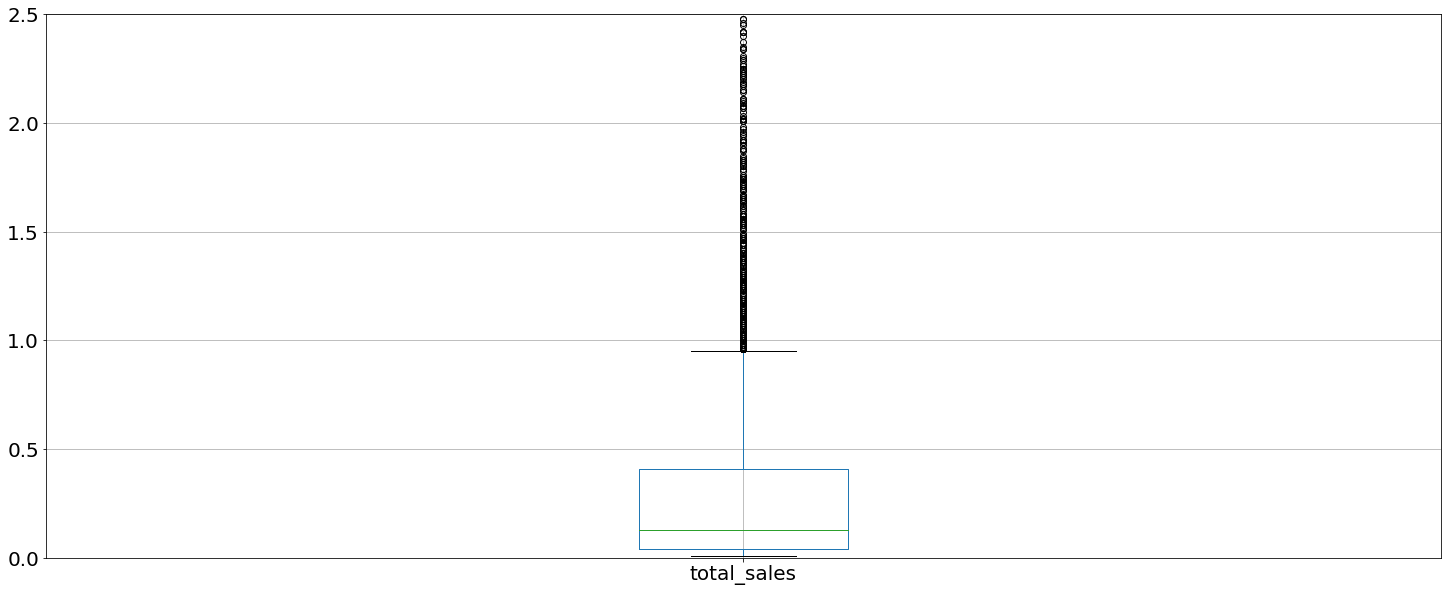

In [25]:
#Boxplot по глобальным продажам игр.
plot = last_dt.boxplot('total_sales', fontsize=20, figsize=(25,10)).set_ylim(0, 2.5) 

***Среднее значение по продажам до 1,2 млн долларов. Медиана - 0,2 миллиона долларов.***

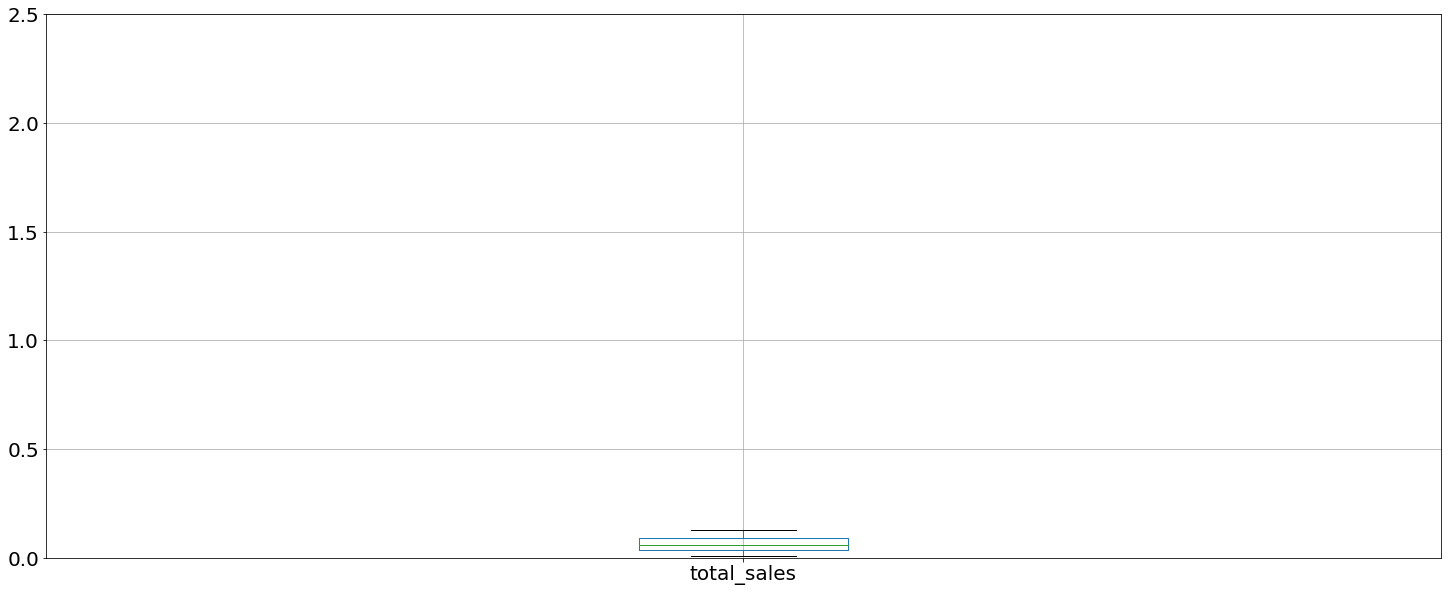

In [26]:
#Boxplot для DS
ds_plt = last_dt.query('platform == "PS2"')
plot_1 = ds_plt.boxplot('total_sales', fontsize=20, figsize=(25,10)).set_ylim(0, 2.5)

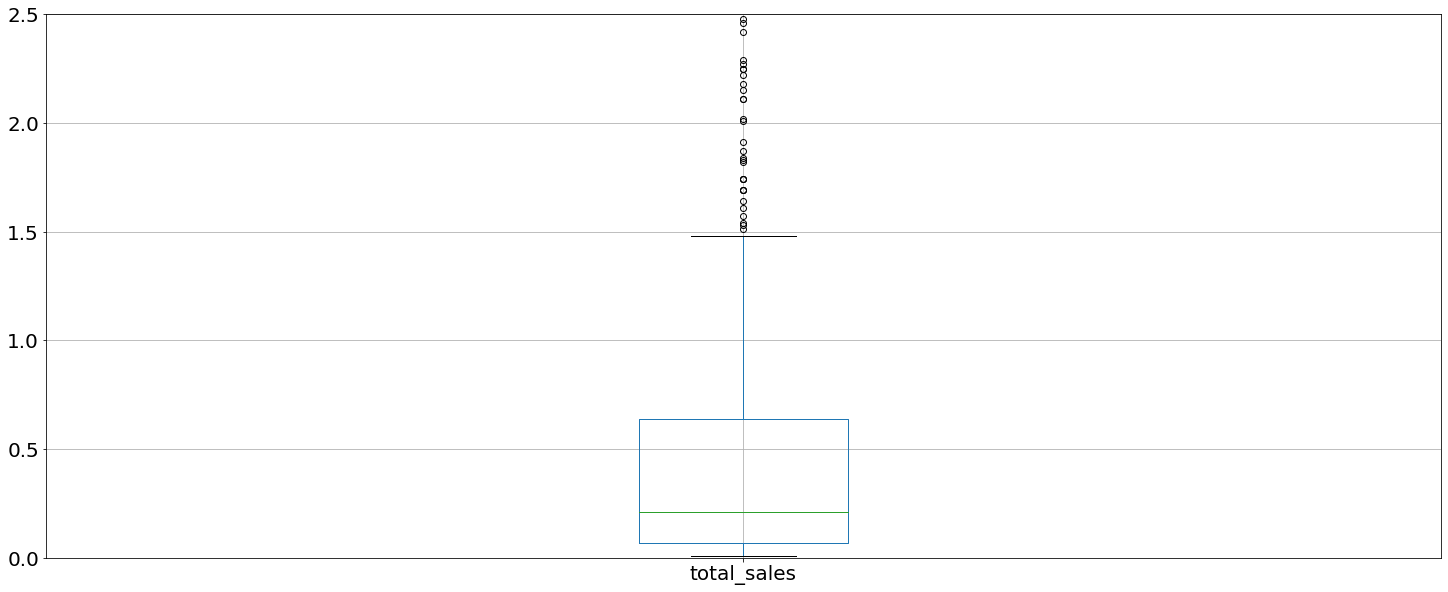

In [27]:
#Boxplot для PS3
ps3_plt = last_dt.query('platform == "PS3"')
plot_2 = ps3_plt.boxplot('total_sales', fontsize=20, figsize=(25,10)).set_ylim(0, 2.5)

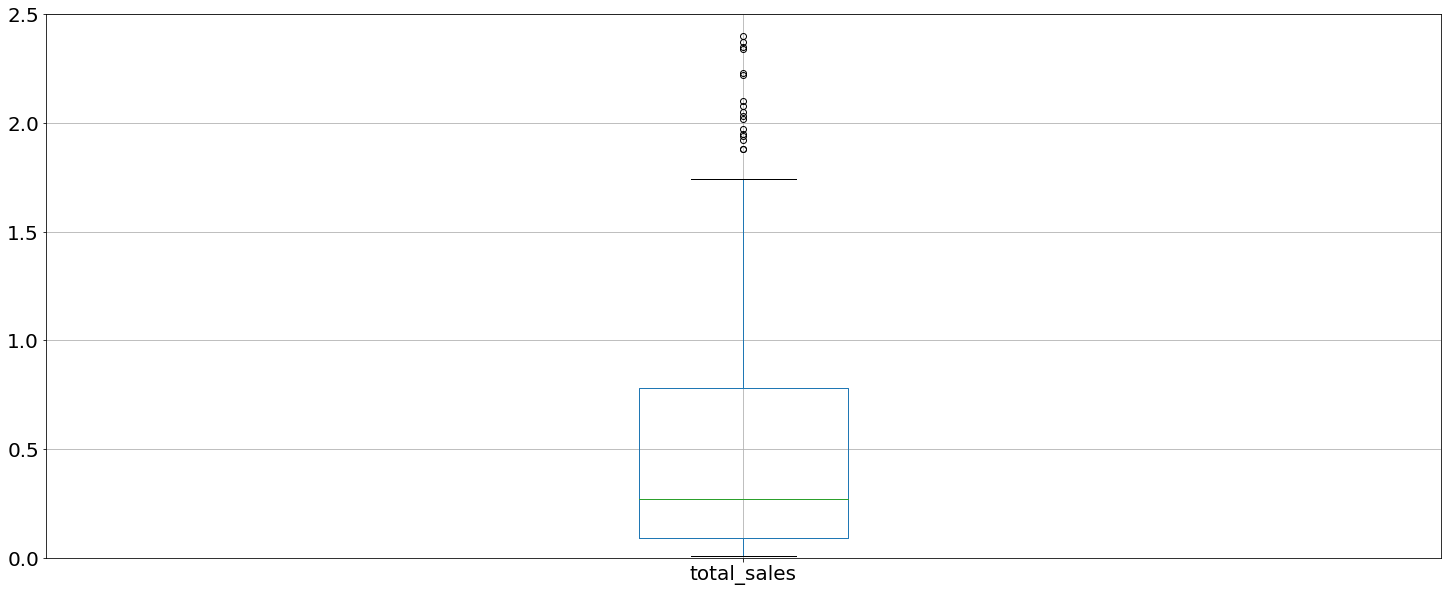

In [28]:
#Boxplot для X360
x360_plt = last_dt.query('platform == "X360"')
plot_3 = x360_plt.boxplot('total_sales', fontsize=20, figsize=(25,10)).set_ylim(0, 2.5)

***Медиана по топовым платформам варьируется от 0,2 до 0,25 млн долларов прибыли за игру.
Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS3 и X360 - на уровне 1,7 млн долларов.
У остальных - от 1 до 1,5 миллионов долларов.
Среди всех выделяется Nintendo DS - у него эти показатели сильное ниже. Медиана < 0,1 миллиона долларов, верхняя граница - 0,6 млн.***

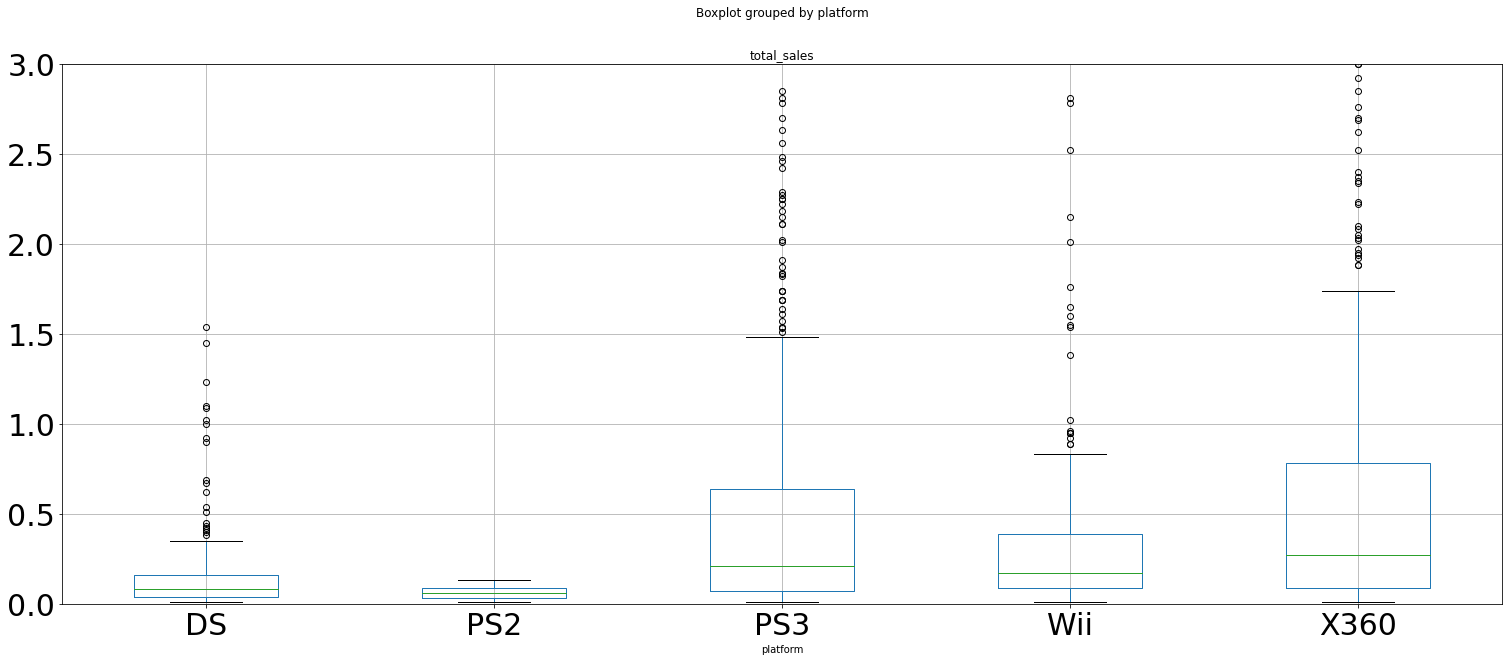

In [29]:
title='boxplot по top-платформам'
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
df_query = last_dt.query("platform in @top_platforms")
x1 =df_query.boxplot(column='total_sales', by='platform', fontsize=30, figsize=(25,10)).set_ylim(0,3)

<h3>Посмотрим как влияют отзывы пользователей и критиков на продажи внутри одной платформы</h3>

Считать будем на PS3.

* отзывы от пользователей
* отзывы от критиков<br>
Оценить корреляцию между оценками критиков и пользовательскими оценками

In [30]:
#продажи/отзывы критиков
games_ps3 = games[(games['platform'] == 'PS3') & (games['critic_score'] > 0)].copy()

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

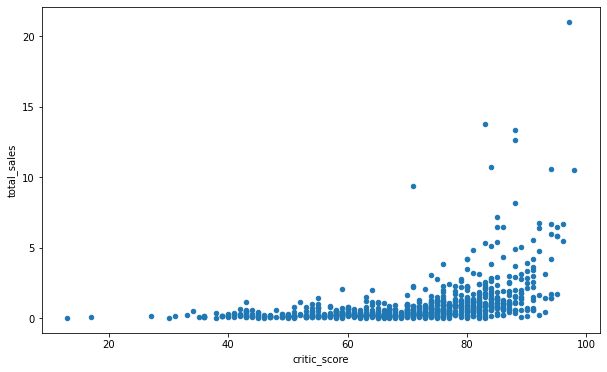

In [31]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

critic_ps3 = games[(games['platform'] == 'PS3') & (games['critic_score'] > 0)].copy()
critic_ps3.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,6))

***Рейтинг критиков оказывает влияние на продажи! Продажи увеличиваются с увеличением рейтингов критиков.***


In [32]:
#продажи/отзывы пользователей
#user_ps3 = games[(games['platform'] == 'PS3') & (games['user_score'] > 0)].copy()
#user_ps3.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,6))

***Зависимость сохраняется. Чуть больше выбивающихся значений***

In [33]:
#проверим корреляцией, убираем маркеры
critic_score = games[games['critic_score'] != -1]
user_score = games[games['user_score'] != -1]

In [34]:
corr_df = pd.DataFrame()
corr_df['critic_score'] = critic_score['critic_score']
corr_df['user_score'] = user_score['user_score']
#corr_df

In [35]:
corr = corr_df[['critic_score', 'user_score']].corr()
corr

,critic_score
critic_score,1.0


***Зависимость подтвердилась. Зависимость продаж от отзывов критиков сильнее чем от отзывов игроков***

<div class="alert alert-block alert-info">Проверим для X360 и Wii

TypeError: '>' not supported between instances of 'str' and 'int'

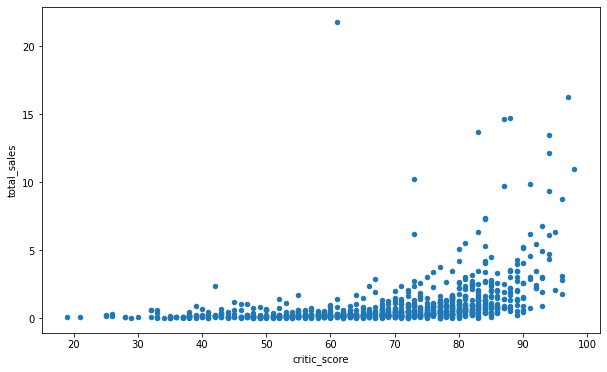

In [36]:
games_X360 = games[(games['platform'] == 'X360') & (games['critic_score'] > 0)].copy()
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

critic_X360 = games[(games['platform'] == 'X360') & (games['critic_score'] > 0)].copy()
critic_X360.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,6))
user_X360 = games[(games['platform'] == 'X360') & (games['user_score'] > 0)].copy()
user_X360.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,6))

TypeError: '>' not supported between instances of 'str' and 'int'

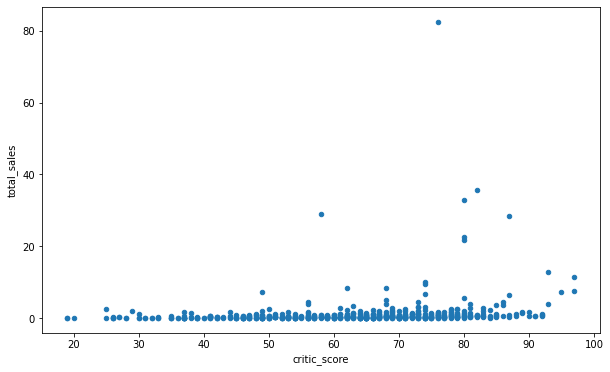

In [37]:
games_Wii = games[(games['platform'] == 'Wii') & (games['critic_score'] > 0)].copy()
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

critic_Wii = games[(games['platform'] == 'Wii') & (games['critic_score'] > 0)].copy()
critic_Wii.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,6))
user_Wii = games[(games['platform'] == 'Wii') & (games['user_score'] > 0)].copy()
user_Wii.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,6))

<div class="alert alert-block alert-info">Есть подтверждение. У Wii зависимость менее выражена

<a id='bullet_4'></a><h3>Часть 4. Составить порьрет пользователя для каждого региона</h3>

<AxesSubplot:title={'center':'Сев. Америка'}, xlabel='platform'>

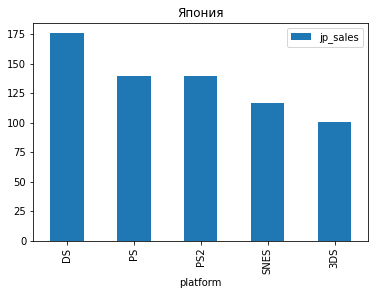

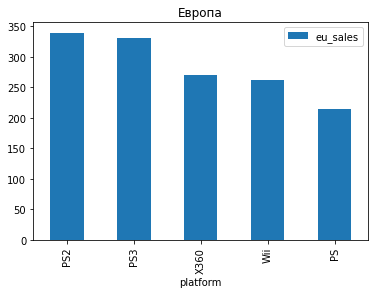

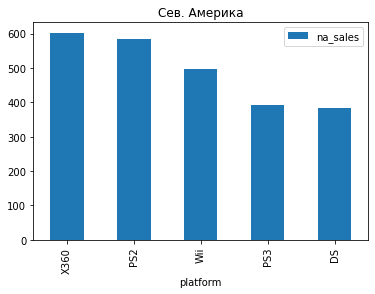

In [38]:
# Топ-предпочтительных платформ
games.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar',  title='Япония')
games.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', title='Европа')
games.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', title='Сев. Америка')

***Япония -DS<br>
Европа - PS2<br>
Сев. Америка - X360<br>***

In [39]:
#на какой платформе было выпущено больше всего игр
most_popular_plt = games.groupby('platform').agg({'name':'count'}).reset_index()
most_popular_plt.sort_values(by='name', ascending=False).head()

,platform,name
16,PS2,2161
4,DS,2151
17,PS3,1331
26,Wii,1320
28,X360,1262


***больше всего игр выпускает PS2***

In [40]:
#популярные жанры
most_popular_genre = games.groupby('genre').agg({'name':'count'}).reset_index()
most_popular_genre.sort_values(by='name', ascending=False).head()

,genre,name
0,Action,3369
10,Sports,2348
3,Misc,1750
7,Role-Playing,1498
8,Shooter,1323


***Популярен экшн жанр***

<AxesSubplot:title={'center':'Северная Америка'}, xlabel='genre'>

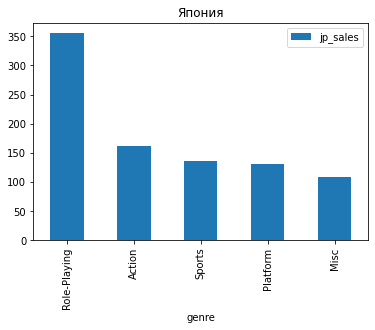

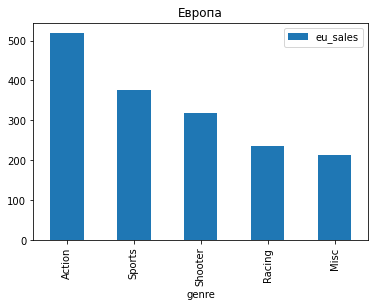

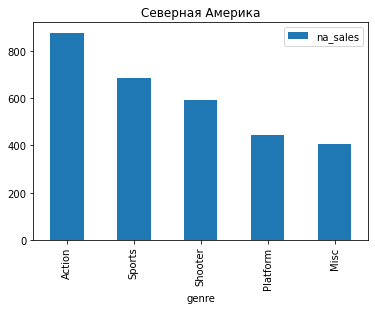

In [41]:
#Жанровые предпочтения по регионам
games.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', title='Япония')
games.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar',  title='Европа')
games.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', title='Северная Америка')

***Популярен экшн жанр*** 

<AxesSubplot:title={'center':'Сев. Америка'}, xlabel='esrb_rating'>

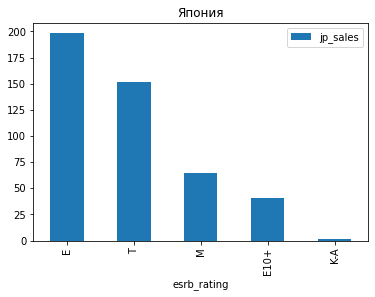

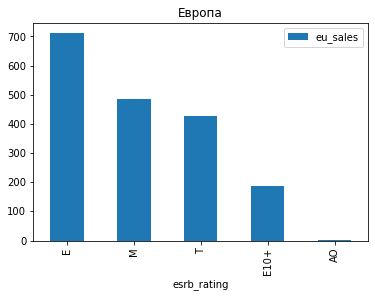

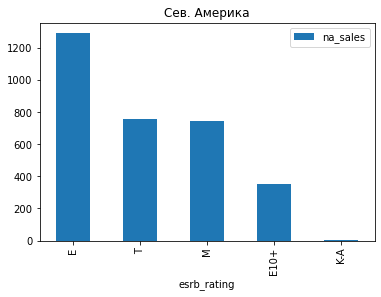

In [42]:
#Влияние рейтинга ESRB на продажи в регионах
# E - для всех
# T - 13+ подростки
# M - 17+
# E10 - 10+
games.groupby(by='esrb_rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', title='Япония')
games.groupby(by='esrb_rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', title='Европа')
games.groupby(by='esrb_rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', title='Сев. Америка')

***Северная Америка играет в основном на X360 и PS2. Wii, PS3, DS - 3,4,5 место соответственно.***

***Европа:  PS2 и PS3 - 1,2 места. Далее X360, Wii и PS.***

***Япония: лидер - DS. Далее PS и PS2. 4,5 места -  SNES и 3DS.***
***Европа и Америка играют в экшн-игры, шутеры и спортивне. Япония - ролевые игры преобладают, а потом уже экшн и спорт.***

***Рейтинг для всех продается в Северной Америке и в Европе практиески одинаково. Далее по продажам - рейтинг "13-19 лет" и "для лиц старше 17 лет".***

***Япония - первое место  - "Для всех", на втором - игры для детей (13-19 лет).***

[назад к оглавлению](#bullet_0)

<div class="alert alert-block alert-info">К сожалению написание функция мне дается пока с трудом

<a id='bullet_5'></a><h3>Часть 5. Проверить гипотезы</h3>
    
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые;<br>
* средние пользовательские рейтинги жанров Action и Sports разные.<br>

Для проверки обеих гипотез будем использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.
Определим пороговое значение alpha = 0.05

In [ ]:
#Принимаем H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
#Соответственно H1 - средние пользовательские рейтинги платформ Xbox One и PC отличаются.
xbox_one_ratings = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
alpha = 0.05
results = st.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

***С большой вероятностью допускаем, что рейтинги платформ Xbox One и PC отличаются***

In [43]:
# Принимаем H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
# Соответственоо H1: средний пользовательский рейтинг жанров Action и Sports различается
action = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
alpha = 0.05
results = st.ttest_ind(action, sports, equal_var=False)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

TypeError: '>' not supported between instances of 'str' and 'int'

***Действительно средние пользовательские рейтинги жанров Action и Sports одинаковы***

[назад к оглавлению](#bullet_0)

<div class="alert alert-block alert-info">equal_var (от англ. equal variance, «равная дисперсия») — необязательный параметр, задающий считать ли равными дисперсии выборок. Передаётся как "equal_var = True" или "equal_var = False" (True — считать, False — не считать). Есть основание полагать, что выборки взяты из схожих по параметрам совокупностей? Тогда укажите этот параметр как True, и дисперсия каждой выборки будет оценена по объединённому датасету из двух выборок, а не для каждой по отдельности по значениям в ней самой.
Так делают, чтобы получить более точные результаты. Но только в том случае, если считать примерно равными дисперсии генеральных совокупностей, из которых взяты выборки. Иначе параметр нужно указать как False; по умолчанию он задан как True (если вообще его не указывать).

In [44]:
np.var(xbox_one_ratings)

NameError: name 'xbox_one_ratings' is not defined

In [ ]:
np.var(pc_ratings)

In [ ]:
np.var(action)

In [ ]:
np.var(sports)

<a id='bullet_6'></a><h2>Общий вывод</h2>

***Перед нами стояла задача установить закономерности, определяющие успешность игр, для построения маркетингоавой стратегии стримингово сервиса.***<br>
На первом этапе была изучена общая информация, проведена обработка даннх. Проверили на наличие дубликатов <br> Проведена замена типов данных<br>


Есть период роста продаж с 1990 го по 2011 с пиками(возможно технологческие прорывы). В 2011 году падение. Возможно 2011-2015 г. можно взять за период намечающейся новой тенденции с возможным ростом или продолжением снижения интереса к играм в 2017.<br>


Выявили шсть безусловных лидеров популярных платформ, в порядке убывания: PS2, X360, PS3, Wii, DS, PS<br>


Установили среднюю продолжительность "жизни платформ - 10 лет видимо до выхода более технологичной и мощной модели.<br> 



Установили среднее значение по продажам до 1,2 млн долларов. Медиана - 0,2 миллиона долларов.
Медиана по топовым платформам варьируется от 0,2 до 0,25 млн долларов прибыли за игру.
Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS3 и X360 - на уровне 1,7 млн долларов.
У остальных - от 1 до 1,5 миллионов долларов.

Были установлены зависимости продаж от рейтинга критиков
Мнение игроков также может повлиять на продажи, но в меньшей степени


***Установили:***

Популярные платформы по регионам:<br>

Япония -DS<br>
Европа - PS2<br>
Сев. Америка - X360<br>

Больше всего игр выпускает PS2<br>

Популярен экшн жанр<br>

Северная Америка играет в основном на X360 и PS2. Wii, PS3, DS - 3,4,5 место соответственно.<br>

Европа:  PS2 и PS3 - 1,2 места. Далее X360, Wii и PS.<br>

Япония: лидер - DS. Далее PS и PS2. 4,5 места -  SNES и 3DS.<br>
Европа и Америка играют в экшн-игры, шутеры и спортивне. Япония - ролевые игры преобладают, а потом уже экшн и спорт.<br>

Топ-рейтинг по регионам:<br>

Рейтинг "для всех" продается в Северной Америке и в Европе практиески одинаково. Далее по продажам - рейтинг "13-19 лет" и "для лиц старше 17 лет".<br>
Япония - первое место  - "Для всех", на втором - игры для детей (13-19 лет).<br>


***Итогове рекомендации:*** 

Рынок находится на спаде, тем неменее крупные и средние производители продолжают выпускать новые игры, платформы совершенствуются и стриминговые интернет ресурсы и сервисы волне могут быть рентабелены. 
Для повышения продаж целесообразно продвигать игры через критиков и экспертов. В меньшей степени расчитывать на отзывы игроков.<br> 
Стоит отдавать предпочтение на продвижение игр жанра экшн и спорт, с общим рейтингом, выходящих для наиболее популярных платформах: PS2, X360, PS3, Wii, DS, PS<br>
